In [2]:
from numpy import *
import matplotlib.pyplot as plt

# https://blog.csdn.net/chibangyuxun/article/details/53148005

In [7]:
filename='testSet.txt' #文件目录
def loadDataSet():   #读取数据（这里只有两个特征）
    dataMat = []
    labelMat = []
    fr = open(filename)
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])   #前面的1，表示方程的常量。比如两个特征X1,X2，共需要三个参数，W1+W2*X1+W3*X2
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

In [8]:
def sigmoid(inX):  #sigmoid函数
    return 1.0/(1+exp(-inX))

In [9]:
#梯度上升求最优参数
def gradAscent(dataMat, labelMat): 
    dataMatrix=mat(dataMat) #将读取的数据转换为矩阵
    classLabels=mat(labelMat).transpose() #将读取的数据转换为矩阵
    m,n = shape(dataMatrix)
    alpha = 0.001  #设置梯度的阀值，该值越大梯度上升幅度越大
    maxCycles = 500 #设置迭代的次数，一般看实际数据进行设定，有些可能200次就够了
    weights = ones((n,1)) #设置初始的参数，并都赋默认值为1。注意这里权重以矩阵形式表示三个参数。
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = (classLabels - h)     #求导后差值
        weights = weights + alpha * dataMatrix.transpose()* error #迭代更新权重
    return weights

In [10]:
#随机梯度上升，当数据量比较大时，每次迭代都选择全量数据进行计算，计算量会非常大。所以采用每次迭代中一次只选择其中的一行数据进行更新权重。
def stocGradAscent0(dataMat, labelMat):
    dataMatrix=mat(dataMat)
    classLabels=labelMat
    m,n=shape(dataMatrix)
    alpha=0.01
    maxCycles = 500
    weights=ones((n,1))
    for k in range(maxCycles):
        for i in range(m): #遍历计算每一行
            h = sigmoid(sum(dataMatrix[i] * weights))
            error = classLabels[i] - h
            weights = weights + alpha * error * dataMatrix[i].transpose()
    return weights

In [11]:
#改进版随机梯度上升，在每次迭代中随机选择样本来更新权重，并且随迭代次数增加，权重变化越小。
def stocGradAscent1(dataMat, labelMat):
    dataMatrix=mat(dataMat)
    classLabels=labelMat
    m,n=shape(dataMatrix)
    weights=ones((n,1))
    maxCycles=500
    for j in range(maxCycles): #迭代
        dataIndex=[i for i in range(m)]
        for i in range(m): #随机遍历每一行
            alpha=4/(1+j+i)+0.0001  #随迭代次数增加，权重变化越小。
            randIndex=int(random.uniform(0,len(dataIndex)))  #随机抽样
            h=sigmoid(sum(dataMatrix[randIndex]*weights))
            error=classLabels[randIndex]-h
            weights=weights + alpha*error*dataMatrix[randIndex].transpose()
            del(dataIndex[randIndex]) #去除已经抽取的样本
    return weights

In [20]:
def plotBestFit(weights):  #画出最终分类的图
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
#     ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

In [21]:
def main():
    dataMat, labelMat = loadDataSet()
    weights1=gradAscent(dataMat, labelMat).getA()
    print(weights1)
    plotBestFit(weights1)
    
    weights2=stocGradAscent0(dataMat, labelMat).getA()
    print(weights2)
    plotBestFit(weights2)
    
    weights3=stocGradAscent1(dataMat, labelMat).getA()
    print(weights3)
    plotBestFit(weights3)

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


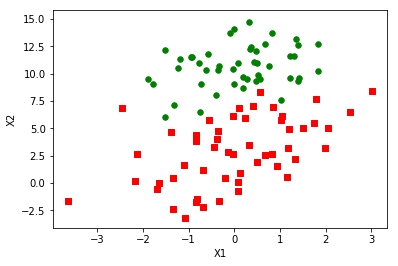

[[ 9.55333325]
 [ 0.87771989]
 [-1.36118565]]


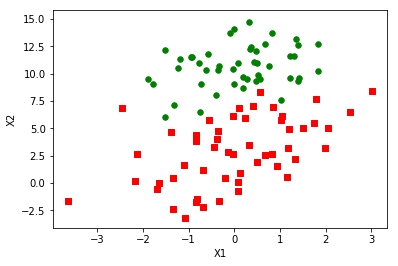

[[13.99672653]
 [ 0.97982713]
 [-1.89058205]]


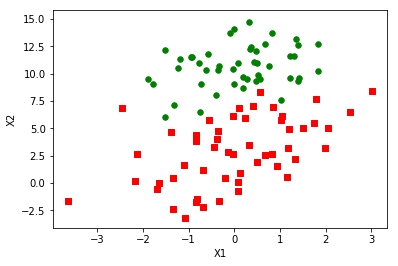

In [22]:
if __name__=='__main__':
    main()